<h1 align='center'><b>Análise das Séries Temporais</b></h1>
<p align="center"><img src= https://datapeaker.com/wp-content/uploads/2021/09/mts-6650631.jpg width="550" height="350" align="center"></p>


<p align='justify'>A Análise de Séries Temporais (AST) pode resolver um problema familiar dos conjuntos de dados que envolve ideias e hipóteses. Alguns Cientistas de Dados utilizam as séries temporais como parte de seu <i>Storytelling</i>. A principal diferença entre a Análise de Séries Temporais e o Aprendizado de Máquina é que a Análise de Séries Temporais não incluem formalmente modelos estatísticos e inferência.</p>
<p align='justify'> Vamos observar alguns padrões fundamentais para a Análise das Séries Temporais, a partir do carregamento dos conjuntos de dados a identificação de <b>tendências</b> e <b>sazonalidades</b>.
<p align='justify'> De um modo geral, a Análise de Séries Temporais é parecido com a <b>Análise Exploratória de Dados (EDA, em inglês)</b> específica para AST. Embora essa comparação seja um pouco equivocada uma vez que a AST pode ser tanto descritiva quanto exploratória.</p>
<p align='justify'>A diferença entre análise descritiva e exploratória é:</p>
<li><b>Análise Descritiva:</b> resumir as características de um Conjunto de Dados.</li>
<li><b>Análise Exploratória:</b> analisar os padrões, tendências, ou relações entre as variáveis.</li>

<p align='justify'>A AST é o processo de extração de informações estatísticas e sumarizadas de uma Séries Temporal, com foco na análise da tendência e sazonalidade.</p>

<p>O passo a passo para trabalhar com Séries Temporais é:</p>
<li>Importar o conjunto de dados</li>
<li>Fazer a limpeza de dados</li>
<li>Entender as variáveis</li>
<li>Descobrir as relações entre as variáveis</li>
<li>Identificar as tendências e sazonalidades</li>
<li>Realizar o preprocessamento (incluindo <i>feature engineering</i>)</li>
<li>Treinar o modelo de <i>Machine Learning</i></li>

<p align='justify'>Neste contexto, é importante saber diferenciar as técnicas que podem ser utilizadas com a análise univariada e multivariada. <b>Análise Univariada</b> significa que estaremos observando apenas uma única variável. <b>Análise Multivariada</b> significa que estaremos observando e calculando as correlações entre variáveis, por meio de gráficos <i>Scatter</i>.</p>

In [93]:
# Trabalhando com datas

from datetime import date

hoje = date.today()
dia_D = date(2022,3,6)

from datetime import datetime
agora = datetime.now()

alguma_data = datetime(2022,3,2,15,00,00)
alguma_data.isoformat()

'2022-03-02T15:00:00'

In [94]:
from datetime import timedelta
year = timedelta(days=365)
year * 10

some_date = date.fromisoformat('2022-03-02')
some_date.strftime('%A %d. %B %Y')

'Wednesday 02. March 2022'

<h3>Pandas - Manipulando Séries Temporais</h3>

In [95]:
import pandas as pd
pd.date_range(start='2022-01-01', end='2022-12-31')

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [96]:
pd.Series(pd.date_range("2021", freq="D", periods=3))

0   2021-01-01
1   2021-01-02
2   2021-01-03
dtype: datetime64[ns]

In [97]:
df = pd.DataFrame({'year': [2021, 2022],
'month': [3, 4],
'day': [24, 25]}
)
ts1 = pd.to_datetime(df)
ts2 = pd.to_datetime('20210324', format='%Y%m%d')
ts1

0   2021-03-24
1   2022-04-25
dtype: datetime64[ns]

In [98]:
# Trabalhando com Janelas de Rolagem

pd.Series([1,2,3,4,5]).rolling(3).sum()

0     NaN
1     NaN
2     6.0
3     9.0
4    12.0
dtype: float64

In [99]:
import numpy as np
rng = pd.date_range('2022-01-01', '2022-12-31', freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2022-01-01   -0.773103
2022-01-02    0.414574
2022-01-03    0.168874
2022-01-04    0.002442
2022-01-05   -0.849438
                ...   
2022-12-27   -2.058820
2022-12-28   -1.181220
2022-12-29    0.835684
2022-12-30    0.494126
2022-12-31   -0.064976
Freq: D, Length: 365, dtype: float64

In [100]:
# Indexando uma Série Temporal
ts[:2]

2022-01-01   -0.773103
2022-01-02    0.414574
Freq: D, dtype: float64

In [101]:
# Atrasando ou adiantando os dados de uma Série Temporal
ts.shift(1)[:5]

2022-01-01         NaN
2022-01-02   -0.773103
2022-01-03    0.414574
2022-01-04    0.168874
2022-01-05    0.002442
Freq: D, dtype: float64

In [102]:
ts.asfreq('M')

2022-01-31    0.281352
2022-02-28   -1.227914
2022-03-31   -0.042470
2022-04-30    0.111317
2022-05-31    0.774774
2022-06-30   -1.936954
2022-07-31   -0.043787
2022-08-31    1.163916
2022-09-30    1.098671
2022-10-31   -0.164980
2022-11-30    0.439001
2022-12-31   -0.064976
Freq: M, dtype: float64

In [103]:
# Dados relativos ao Cotação do Dólar de acordo com Banco Central do Brasil

dados = pd.read_csv("data\Cotação do Dólar por período.csv")
len(dados) # tamanho
dados.columns

Index(['cotacaoCompra', 'cotacaoVenda', 'dataHoraCotacao'], dtype='object')

In [104]:
# Renomeando as colunas
dados = dados.rename(
    columns={'cotacaoCompra': 'compra',
    'cotacaoVenda':'venda',
    'dataHoraCotacao':'dataHora'}
)

dados.dtypes

compra      object
venda       object
dataHora    object
dtype: object

In [105]:
# Convertendo os dados de Compra e Venda de String para Float
dados['compra'] = dados['compra'].str.replace(',','.').astype(float)
dados['venda'] = dados['venda'].str.replace(',','.').astype(float)

In [106]:
# Verificando se não há valores nulos
dados.isnull().mean()

compra      0.0
venda       0.0
dataHora    0.0
dtype: float64

In [107]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
compra,297.0,5.385413,0.210185,4.9200,5.2274,5.3904,5.5661,5.8391
venda,297.0,5.386037,0.210201,4.9206,5.2281,5.3910,5.5667,5.8397


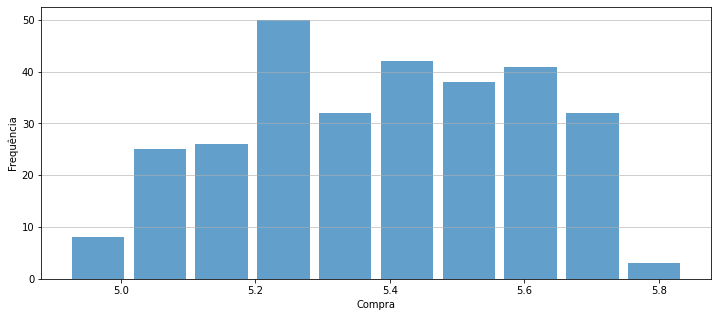

In [108]:
# Vamos plotar esse gráfico
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
n, bins, patches = plt.hist(
    x=dados['compra'],
    bins='auto',
    alpha=0.7,
    rwidth=0.85
)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Compra')
plt.ylabel('Frequência')
plt.show()

<h3>Correlações</h3>

In [109]:
from scipy import stats
stats.pearsonr(dados['compra'], dados['venda'])

(0.9999991252831892, 0.0)

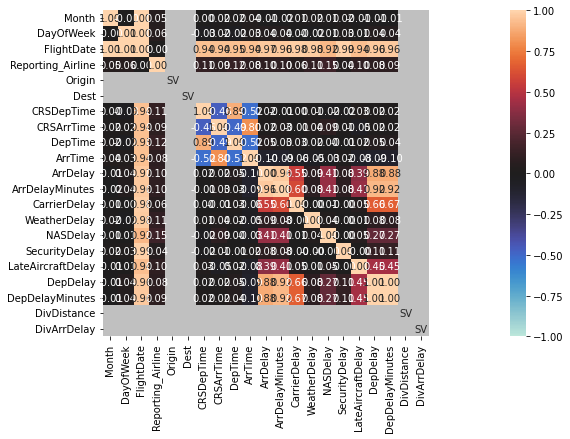

In [110]:
voos = pd.read_csv('data/lax_to_jfk.csv')

import dython

dython.nominal.associations(voos, figsize=(29, 6))
plt.show()

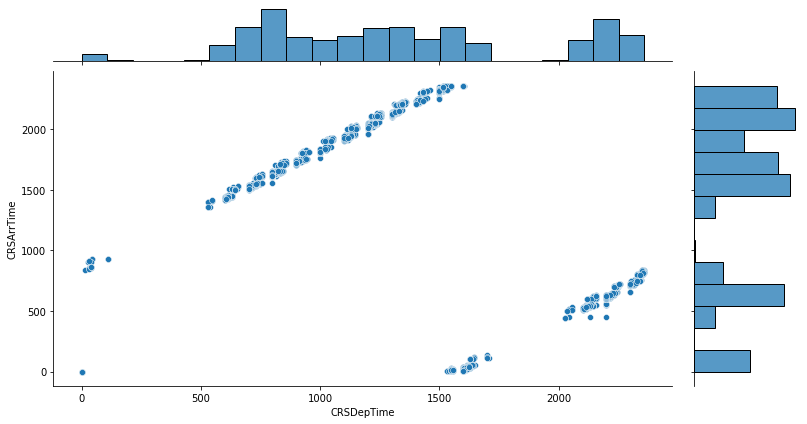

In [111]:
import seaborn as sns
p = sns.jointplot(
    x = 'CRSDepTime',y = "CRSArrTime",
    edgecolor='white',
    data = voos)
plt.gcf().set_size_inches(12, 6)
plt.xlabel('CRSDepTime')
plt.ylabel('CRSArrTime')
plt.show()

<h3>Identificando Tendências e Sazonalidades</h3>
<p align='justify'> As tendências, sazonalidades e as variações cíclicas são as características mais importantes das Séries Temporais. A <b>tendência</b> é a presença de um aumento ou descréscimo, a longo prazo, de uma sequência. A <b>sazonalidade</b> é a variação que ocorre em um intervalo específico no período menores que um ano. A sazonalidade pode ocorrer em diferentes períodos de tempo, tais como semanal, mensal, diária ou até anual E por último, as variações cíclicas que são os aumentos e quedas que não possuem uma frequência fixada.</p>
<p align='justify'> Um aspecto importante das séries temporais é a <b>estacionariedade</b>. Ela se refere à propriedade de uma série temporal não mudar sua distribuição ao longo do tempo. Uma série temporal que não muda ao longo do tempo é chamada de estacionária. Como reflexo desses conceitos, existem muitos modelos ou medidas que assumem a estacionariedade da série temporal, e podem não funcionar adequadamente em dados que não são estacionários. Com esses algoritmos, é possível primeiramente decompor a parte do sinal principal, e então a parte da sazonalidade e tendência da série original.</p>
<p align='justify'>Vamos observar algumas ferramentas que podem nos ajudar a descobrir as tendências, sazonalidades e variações cíclicas. Uma delas, incluem as estátisticas como a autocorrelação e o Teste de Dickey-Fuller, além de visualizações como o Gráfico de Autocorrelação e o <i>periodogram</i>.</p>

In [112]:
# Carregando os dados
sales  = pd.read_csv('data/sales.csv')
sales.index = pd.to_datetime(sales['date'])
sales = pd.DataFrame(sales)

In [113]:
from numpy import polyfit
def fit(X, y, degree=3):
    coef = polyfit(X, y, degree)
    trendpoly = np.poly1d(coef)
    return trendpoly(X)

def get_season(s, yearly_periods=4, degree=3):
    X = [i%(365/4) for i in range(0, len(s))]
    seasonal = fit(X, s.values, degree)
    return pd.Series(data=seasonal, index=s.index)

def get_trend(s, degree=3):
    X = list(range(len(s)))
    trend = fit(X, s.values, degree)
    return pd.Series(data=trend, index=s.index)

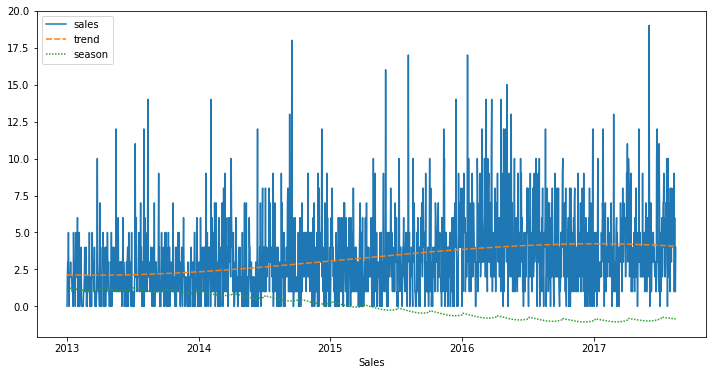

In [114]:
sales['trend'] = get_trend(sales['sales'])
sales['season'] = get_season(sales['sales']) - sales['trend']
sns.lineplot(data=sales[['sales','trend', 'season']])
plt.gcf().set_size_inches(12, 6)
plt.xlabel('Sales')
plt.show()

<p  align='justify'>Nós podemos encontrar essas funcionalidades de forma mais prática utilizando as funcionalidades das bibliotecas <i>seasonal.seasonal_decompose()</i> do statsmodels, ou do Facebook'Prophet, que utiliza os coeficientes de Fourrier.</p>
<p align='justify'>Outro aspecto a ser considerado é a <b>autorrelação</b>. De maneira geral, a correlação é um sinal de uma visão desafasa de sí mesmo, ou seja dos dados que estamos vendo. O grande empenho disso é que podemos observar padrões repetidos durante esse processo.</p>

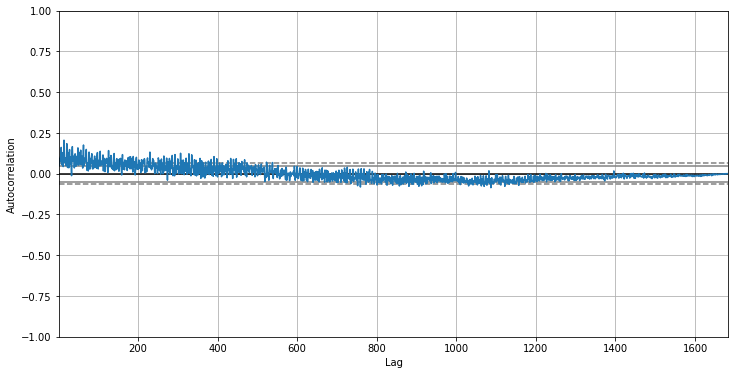

In [115]:
pd.plotting.autocorrelation_plot(sales['sales'])
plt.gcf().set_size_inches(12, 6)
plt.show()

In [116]:
X = sales['sales']
split = int(len(X)/2)
X1, X2 = X[:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('Média do 1º Conjunto = %f, Média do 2º Conjunto= %f' % (mean1, mean2))

print('Variância do 1º Conjunto = %f, Variância do 2º Conjunto= %f' % (var1, var2))

Média do 1º Conjunto = 2.516627, Média do 2º Conjunto= 3.985748
Variância do 1º Conjunto = 5.434325, Variância do 2º Conjunto= 8.725124


<p align='justify'>Podemos verificar que a <b>Média do 1º Conjunto e a Média do 2º Conjunto</b> possuem uma divergência significativa. De igual forma, podemos observar com a <b>Variância dos 1º e 2º Conjuntos</b>. Estes aspectos caracterizam uma <b>Série Temporal Não Estacionária.</b></p>
<p align ='justify'>Para confirmar, podemos verificar o Histograma desta Série. Ao observarmos percebemos que ele não está em uma forma de sino, onde deixaria claro que as médias e a variância são bem distribuídas. O que veremos na figura a seguir é justamente o contrário, a distribuição está deslocada para um lado apenas, caracterizando como um indicador de uma Série Temporal Não estácionária.</p>

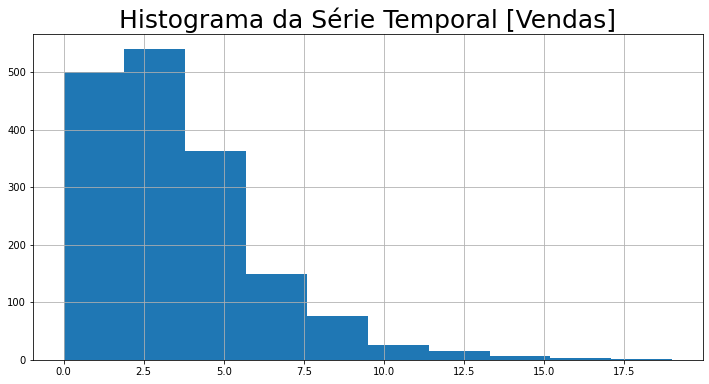

In [117]:
sales['sales'].hist()
plt.title("Histograma da Série Temporal [Vendas]", fontsize=25)
plt.gcf().set_size_inches(12, 6)
plt.show()

<h4><b>Teste de Dickey-Fuller</b></h4>
<p>Este teste é um tipo de teste estatístico chamado de teste de Raíz Unitária. A idéia por tras de um teste de raíz unitária é que ela determina com que força um série temporal é definida por uma tendência. Ele é utilizado para nos informar se uma Hipótese Nula pode ser rejeitada ou não. A Hipótese Nula do teste é que a Série Temporal pode ser representada por uma raíz unitária, que não é estacionária, ou seja, que a sua estrutura sofre alterações ao longo do tempo. A Hipótese Alternativa (rejeitada a Hipósete Nula) é que a série temporal seja estacionária.</p>
<li  align='justify'><b>Hipótese Nula</b>: Se não for rejeitada, indica que a Série Temporal tem uma raiz unitária, o que significa que não é estacionária. Tem alguma estrutura dependente do tempo.</li>
<li align='justify'><b>Hipótese Alternativa</b>: A hipótese nula é rejeitada, dessa forma, infere-se que a Série Temporal não tem uma raiz unitária, o que significa que é estacionária. Não possui estrutura dependente do tempo.</li>


<p align='justify'>Para interpretarmos esse resultado utilizamos o valor do <b><i>p-teste</i></b>. Neste teste, verificamos valores que estão dentro de determinados limites. Um valor de <b><i>p</i></b> abaixo de um limite (como 5% ou 1%) indica que rejeitamos a hipótese nula (ou seja, da série ser estacionária). De forma semelhante, se um valor de <b><i>p</i></b> for acima do limite, nos indica que não rejeitamos a hipótese nula (não estacionária), conforme a seguir:</p>
<li><b>valor de p maior que 0.05</b>: Os dados possuem raíz unitária e não estacionários.</li>
<li><b>valor de p menor ou igual a 0.05</b>: Os dados não possuem raíz unitária e são estacionários.</li>

In [118]:
from statsmodels.tsa.stattools import adfuller

resultado = adfuller(sales['sales'])

print('ADF Statistic: %f' % resultado[0])

print('Valor de p: %f' % resultado[1])

print('Valores Críticos:')

for key, value in resultado[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.078624
Valor de p: 0.001050
Valores Críticos:
	1%: -3.434
	5%: -2.863
	10%: -2.568


<p align='justify'>Os resultados apresentaram um valor de -4.07. Quanto mais negativo esse valor, maior a probabilidade de termos um conjunto de dados estacionário. Ainda, podemos perceber que o valor de -4.07 é menor que -3.43 a 1%. Podemos rejeitar a hipótese nula com um nível de significância inferior a 1% (ou seja, uma baixa probabilidade de que o resultado seja um acaso estatístico), e rejeitando a Hipósete Nula, significa que a série não têm raiz unitária e é uma série estacionária.</p>

<h3>Vamos apresentar uma visualização mais interessante sobre isso.</h3>

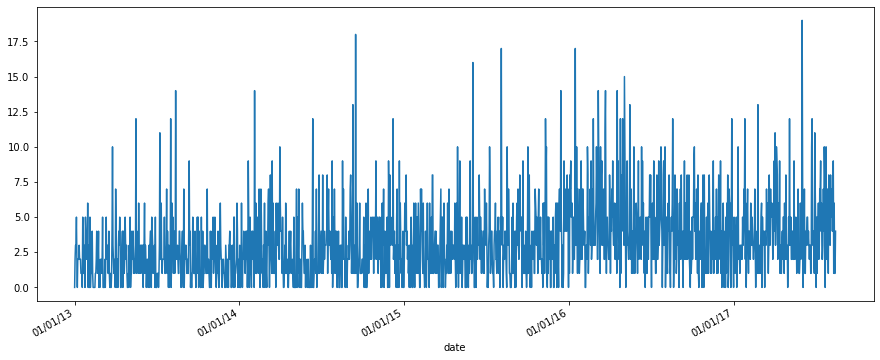

In [119]:
from matplotlib.dates import DateFormatter
date_formatter = DateFormatter("%D")
ax = sales['sales'].plot(figsize=(15, 6))
ax.xaxis.set_major_formatter(date_formatter)

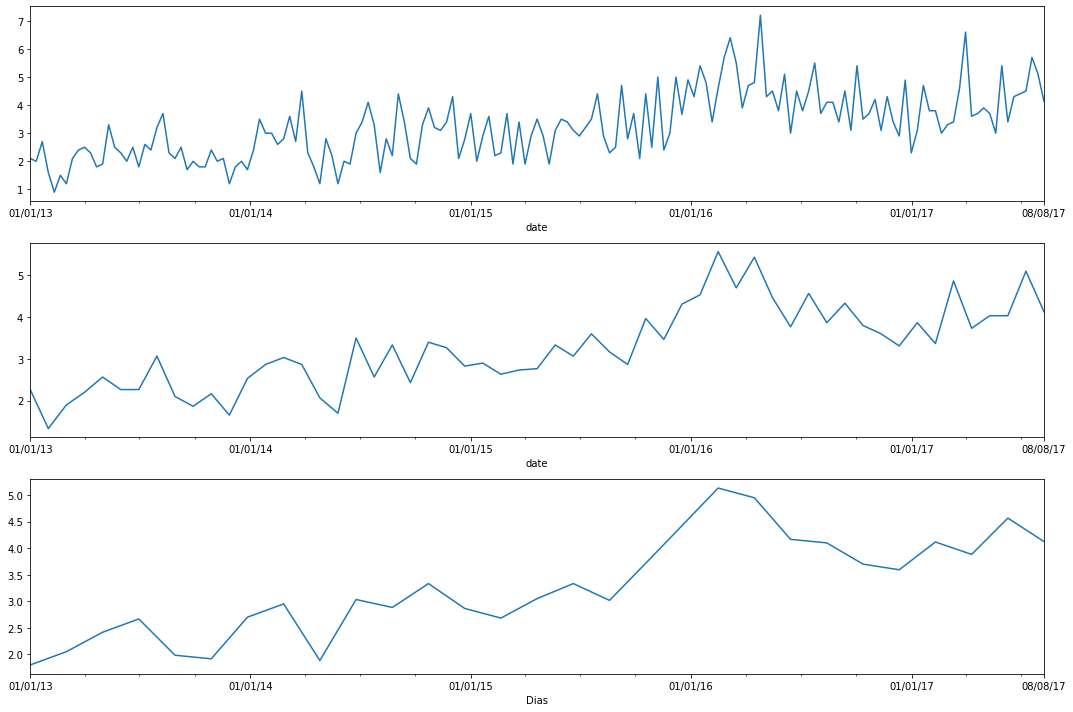

In [120]:
# plotando diferentes frequências dos dados apresentados (10 dias - 1 Mês - 2 Meses)
plt.subplot(311)
ax1 = sales['sales'].resample('10D').mean().plot(figsize=(15, 10))
ax1.xaxis.set_major_formatter(date_formatter)
plt.subplot(312)
ax1 = sales['sales'].resample('30D').mean().plot(figsize=(15, 10))
ax1.xaxis.set_major_formatter(date_formatter)
plt.subplot(313)
ax2 = sales['sales'].resample('60D').mean().plot(figsize=(15, 10))
ax2.xaxis.set_major_formatter(date_formatter)
plt.tight_layout()
plt.xlabel('Dias');
